In [4]:
from google.colab import files


uploaded = files.upload()

Saving churn-bigml-20.csv to churn-bigml-20.csv
Saving churn-bigml-80.csv to churn-bigml-80 (1).csv


Importing relevant libraries for the project

In [3]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets import the train and test data for this project.

In [5]:
train_data = pd.read_csv("churn-bigml-80 (1).csv")
test_data = pd.read_csv("churn-bigml-20.csv")

Now lets see how the train dataset looks like. Will will work on the test_data later on in the project.

In [7]:
print(train_data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

Now lets start with exploring and understanding the data structure to plan for any necessary cleaning or transformations.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [9]:
train_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Lets see if there are some missing data

In [10]:
train_data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


Great, there are no missing values. This is great for us.

#Data Visualization

Now I am going to visualize the train data to see the distribution of the numerical features in the data.

First, lets visualize the numeric features.

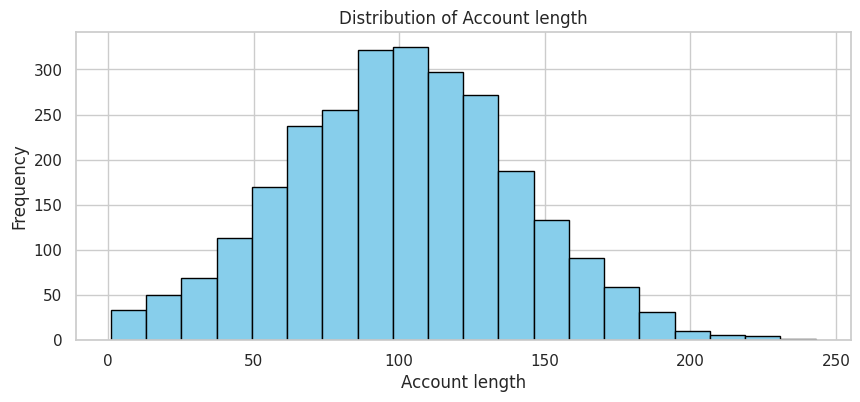

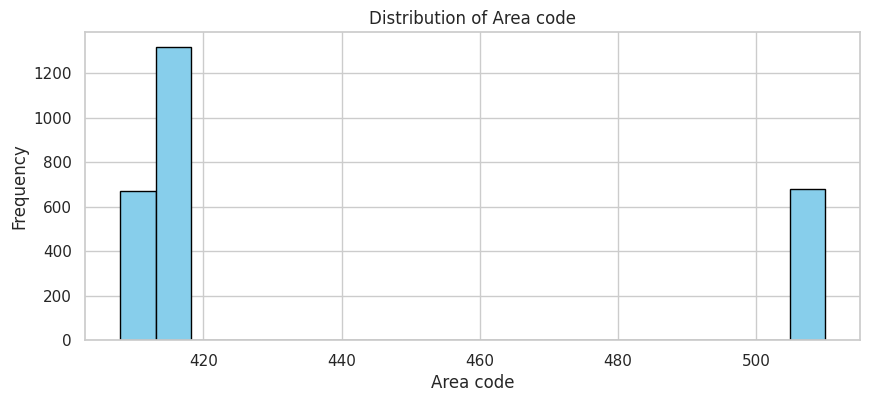

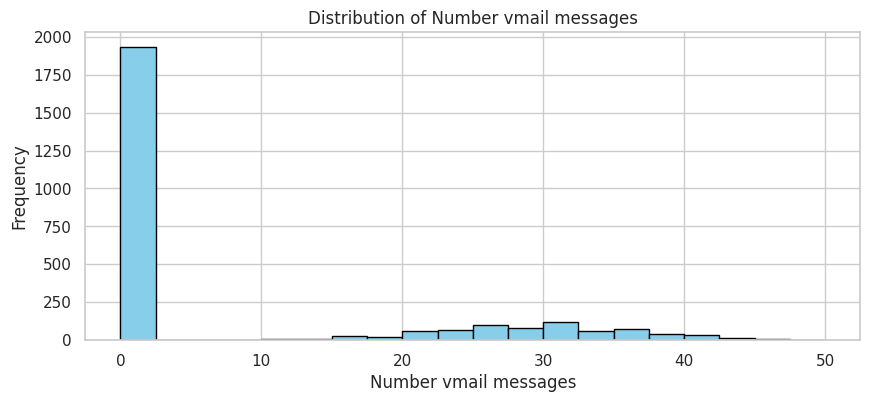

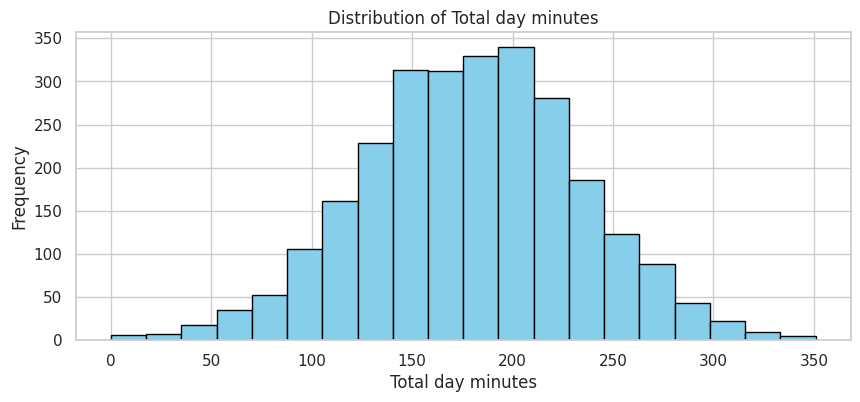

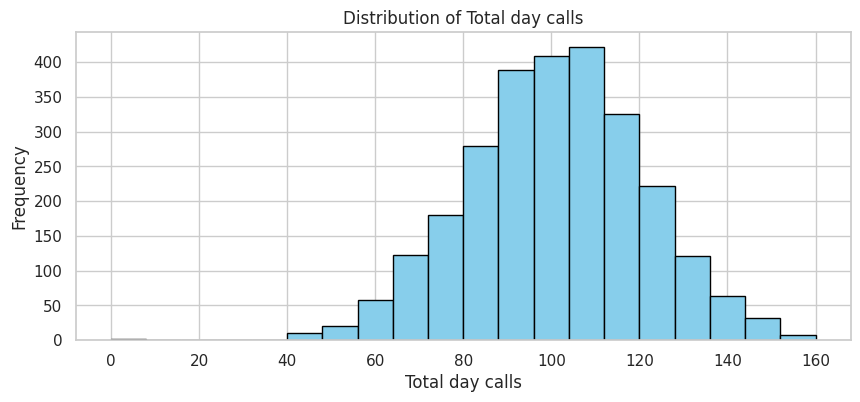

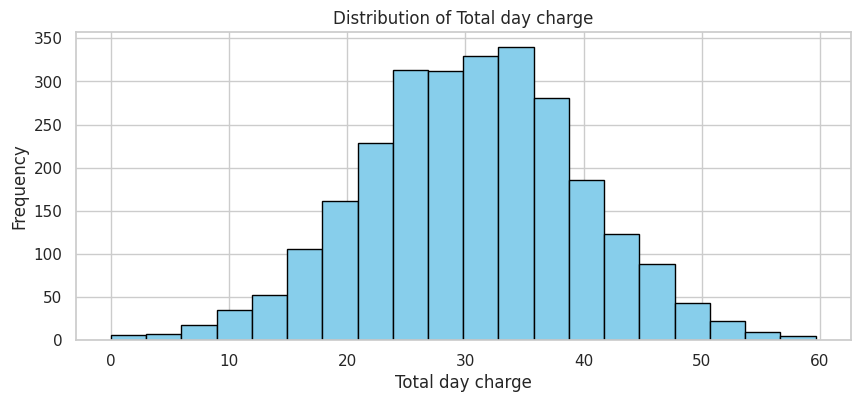

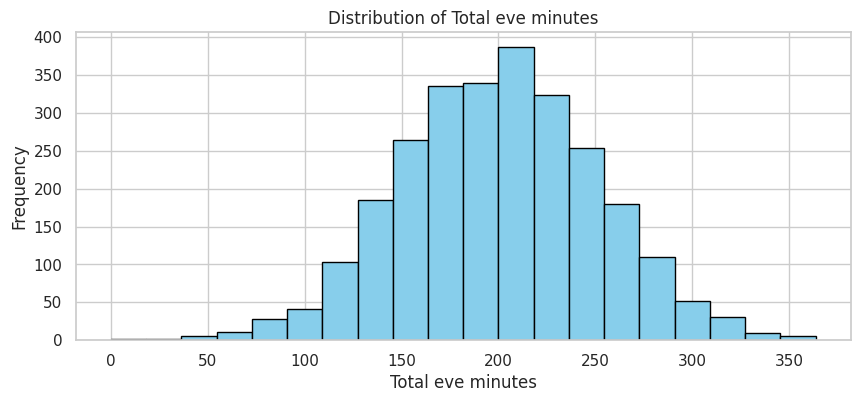

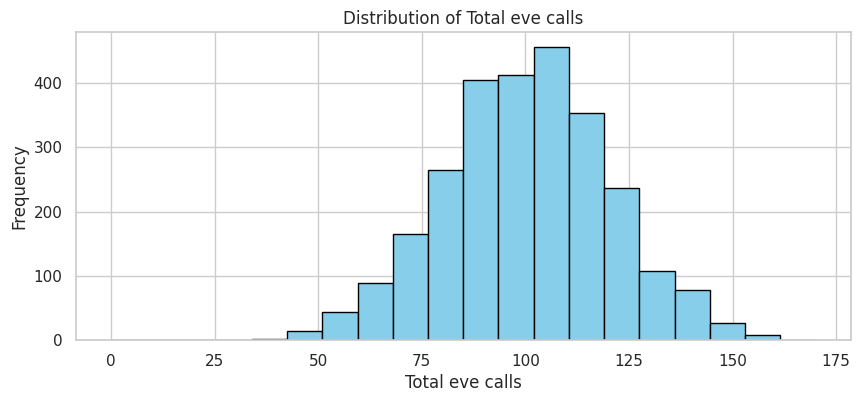

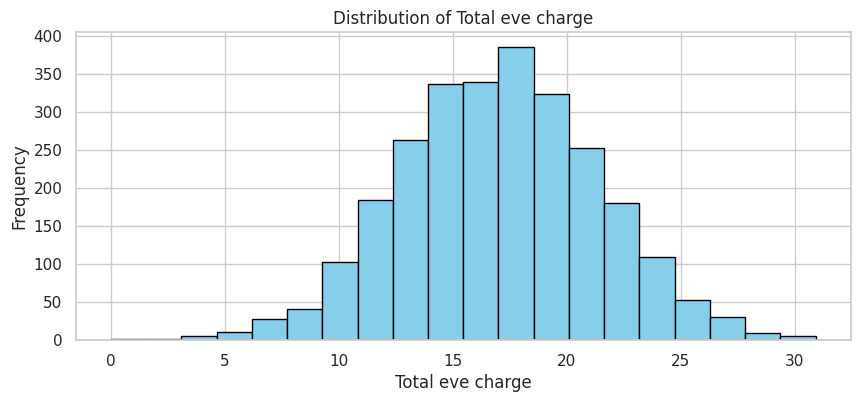

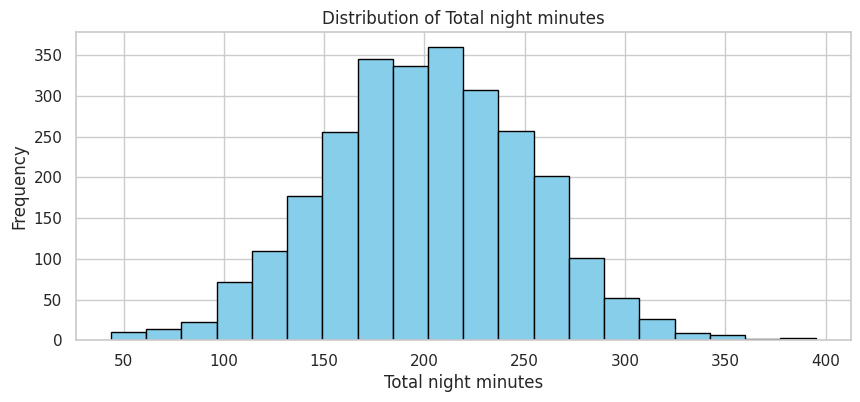

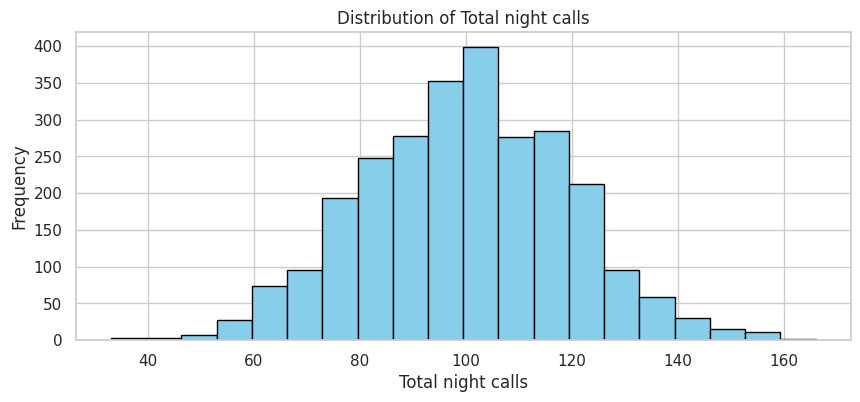

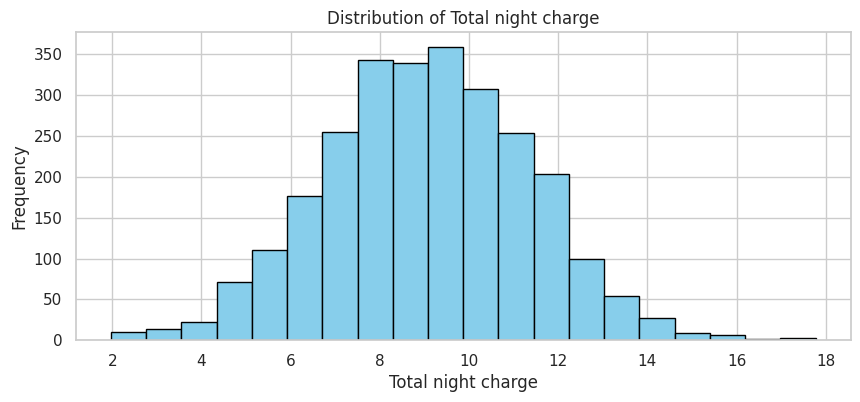

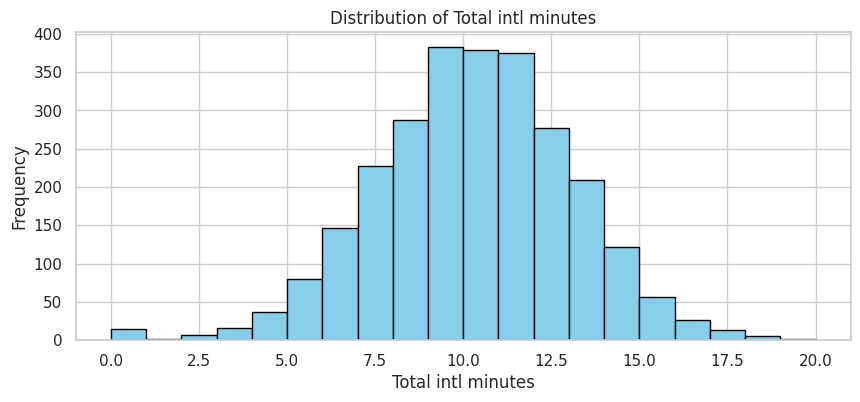

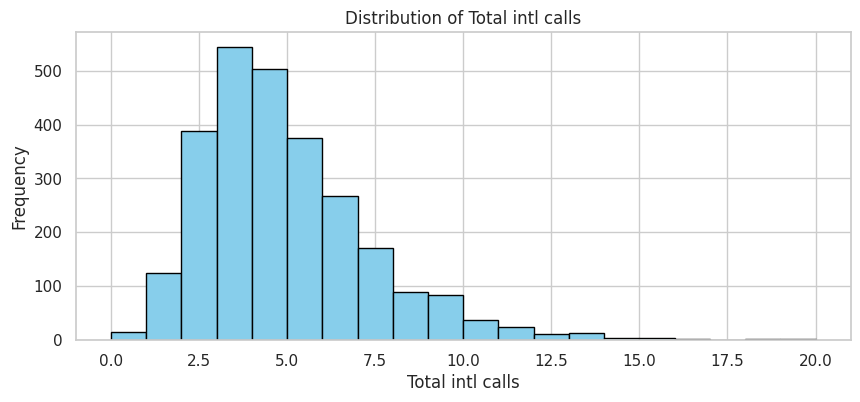

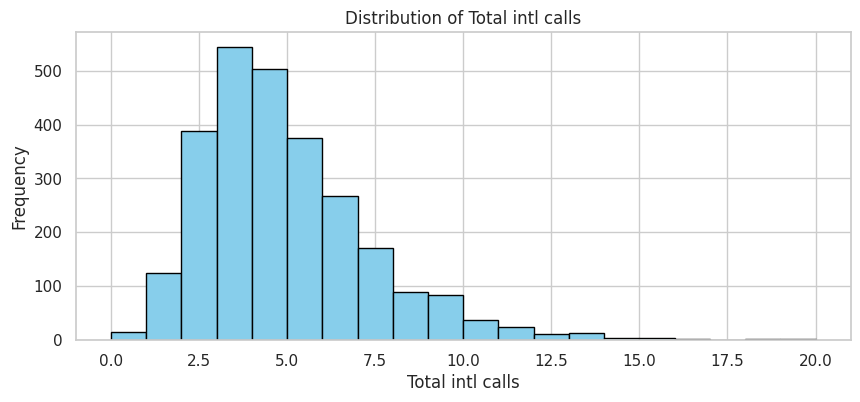

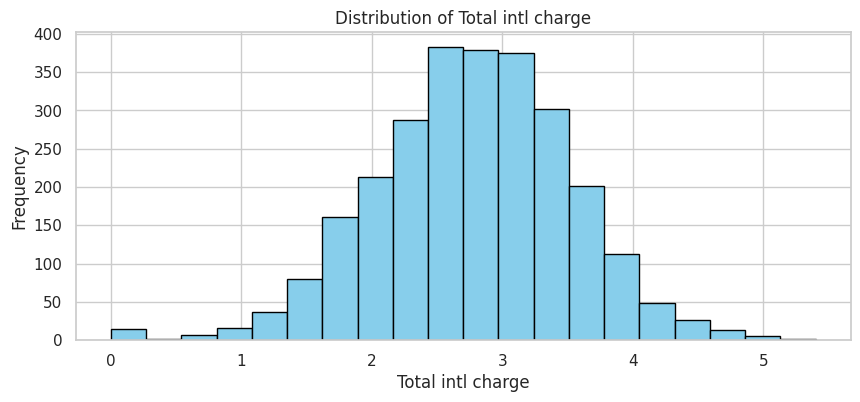

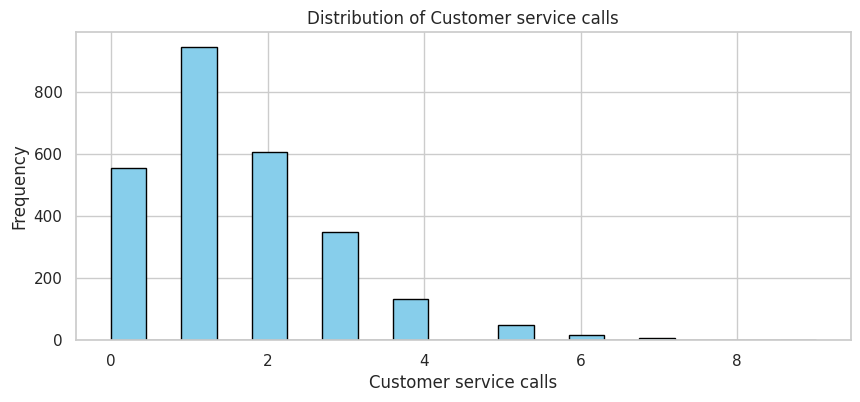

In [16]:
numeric_features = ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl calls', 'Total intl charge', 'Customer service calls'] # Corrected the typo: 'Toal intl charge' to 'Total intl charge'


for feature in numeric_features:
  plt.figure(figsize=(10,4))
  plt.hist(train_data[feature], bins=20, color='skyblue', edgecolor='black')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

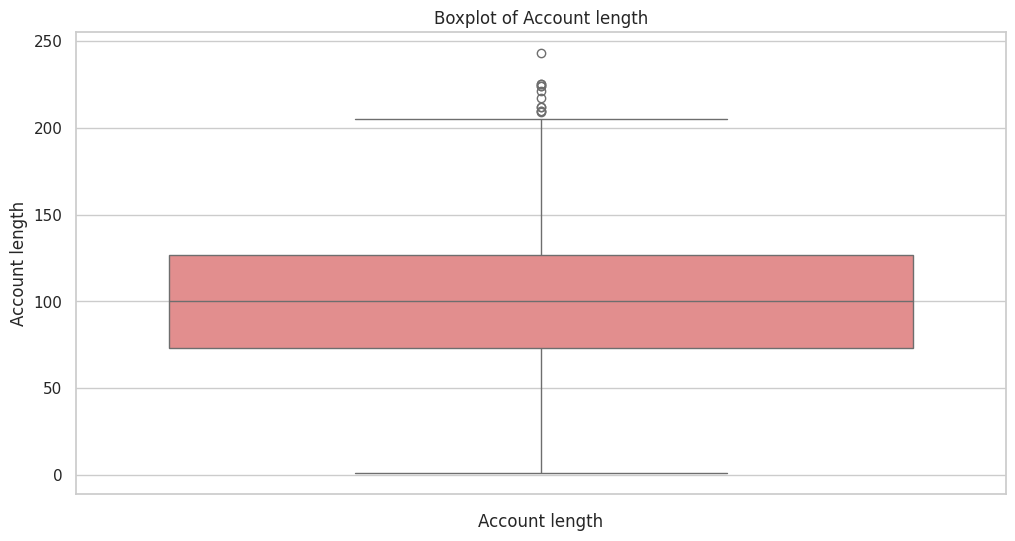

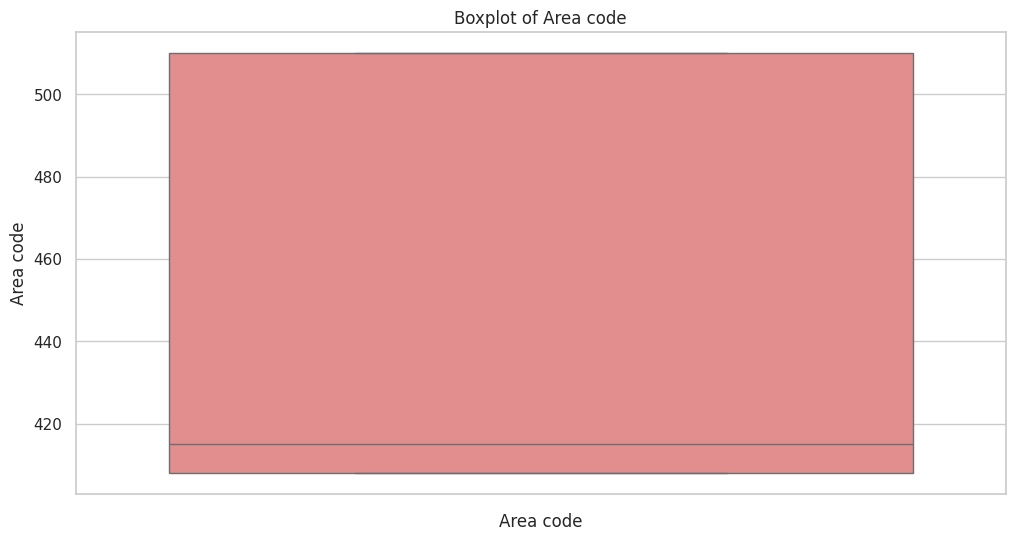

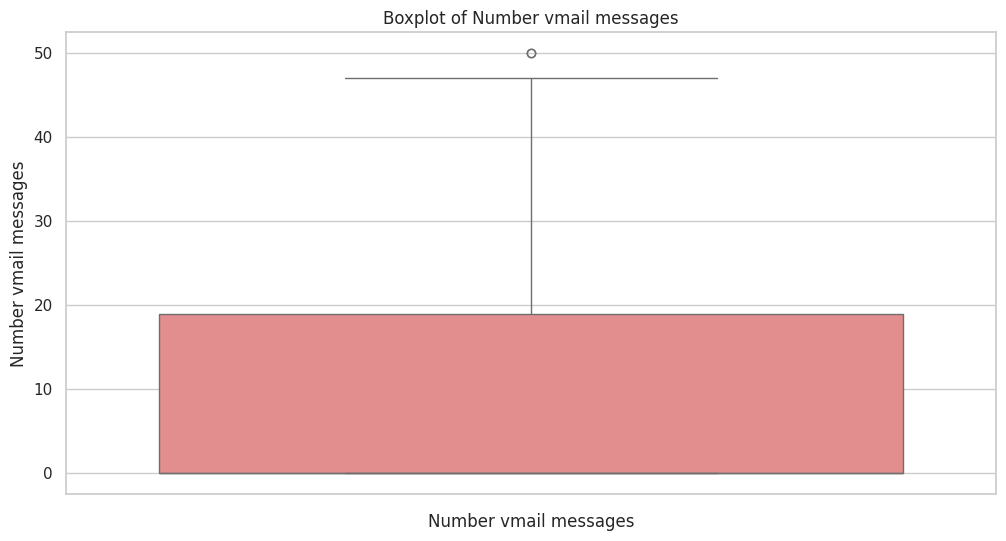

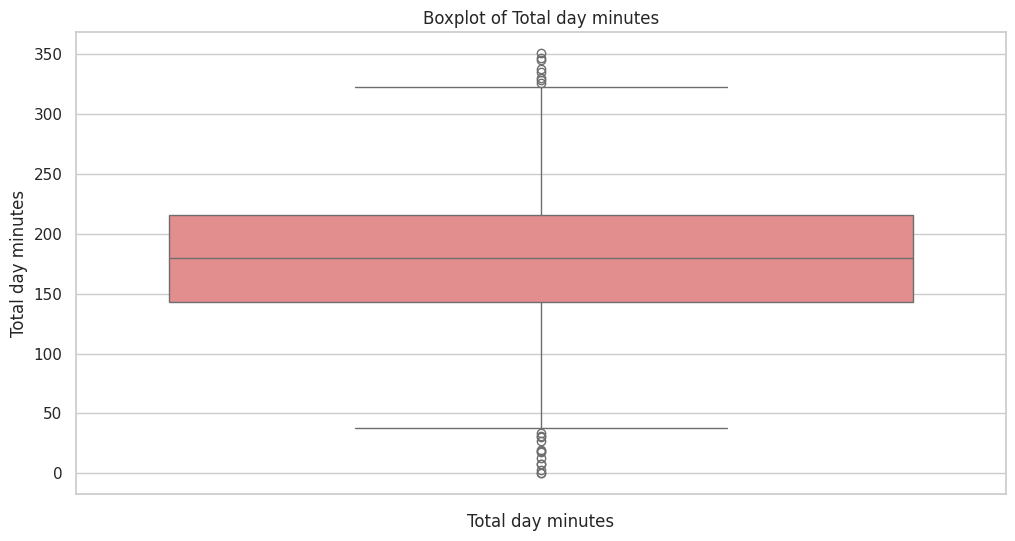

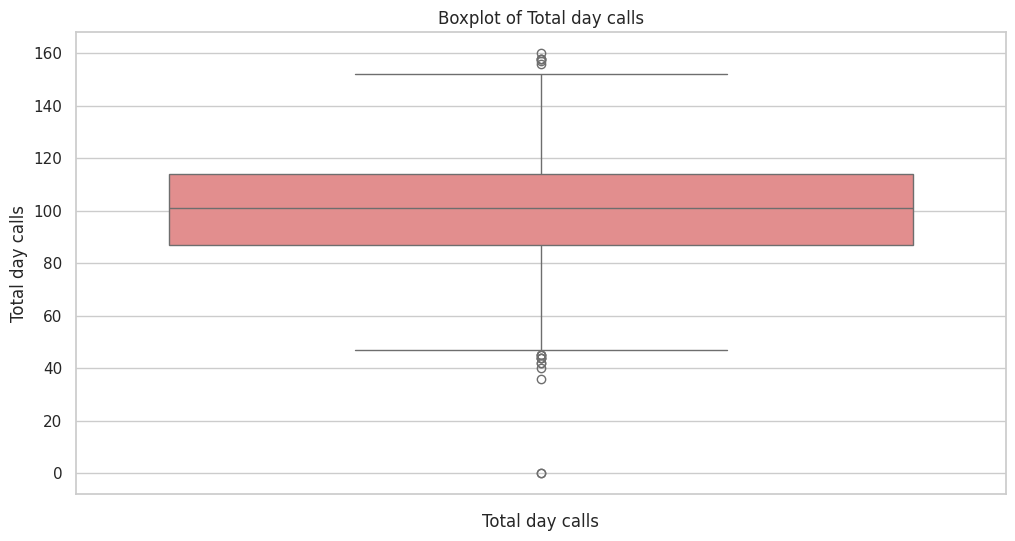

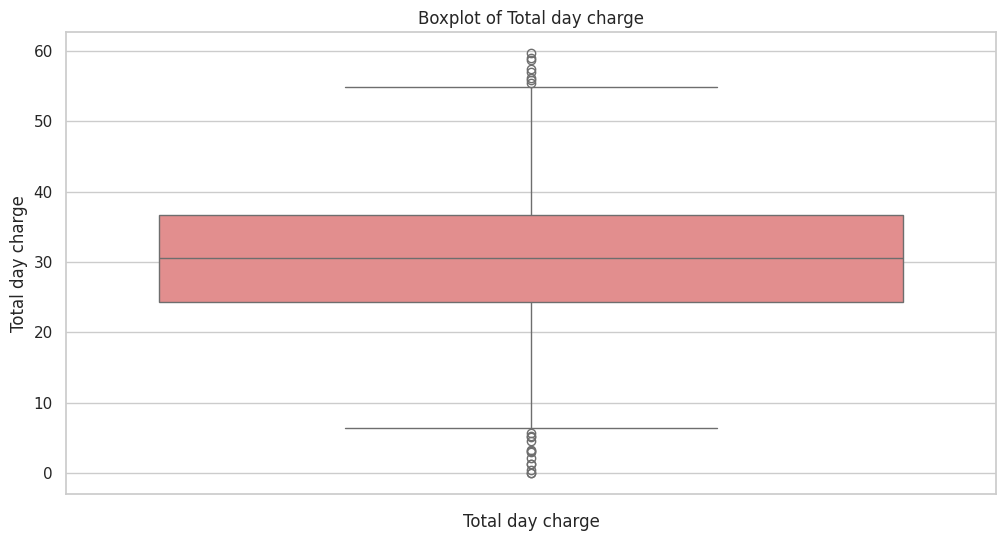

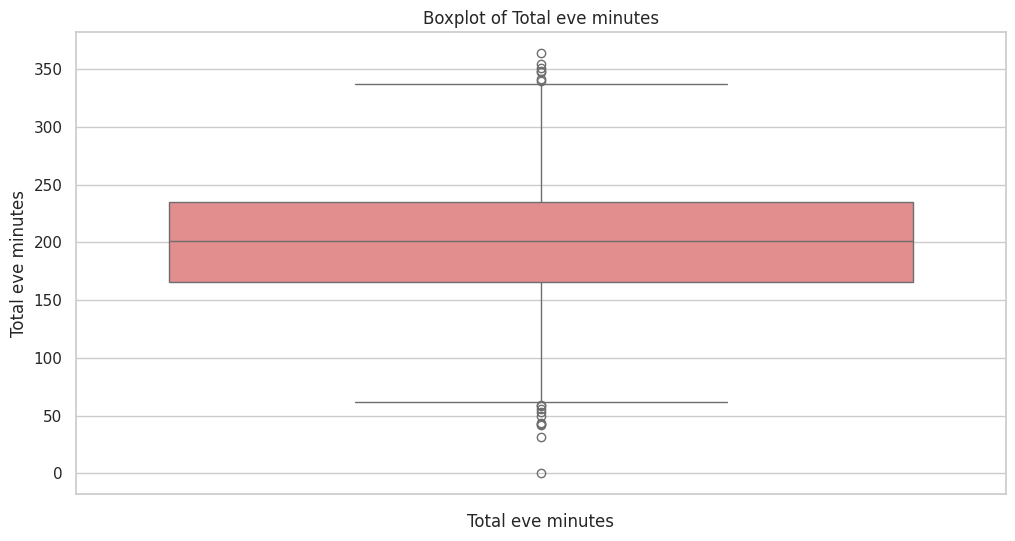

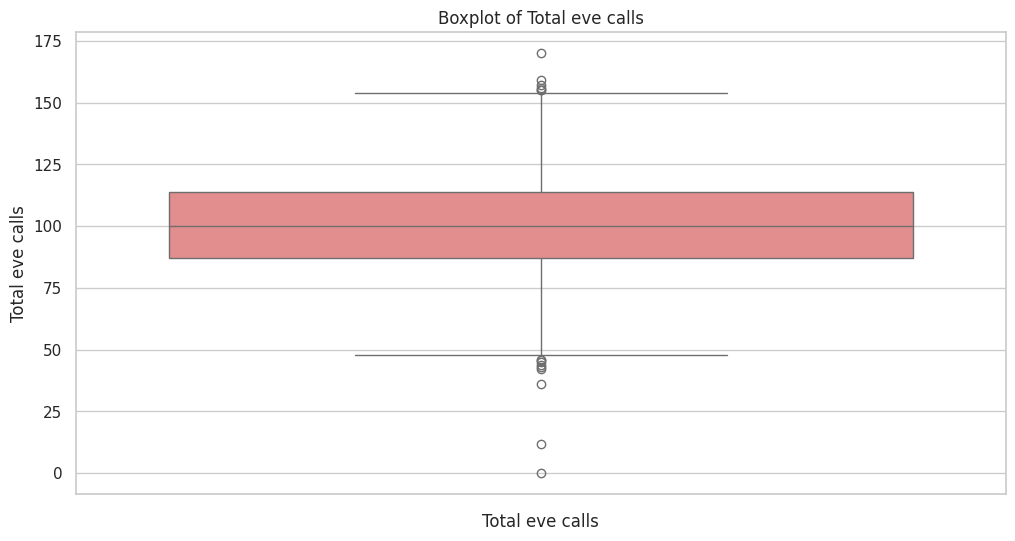

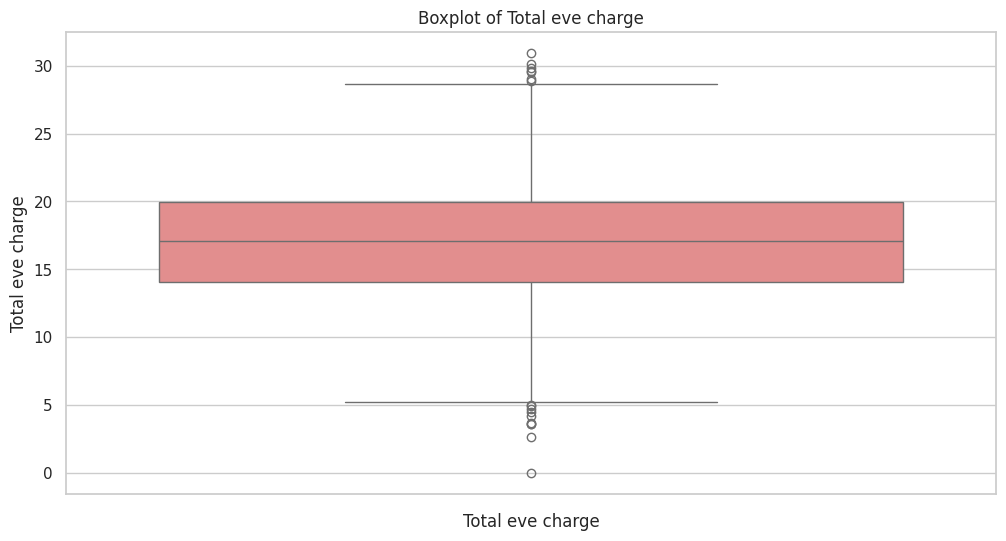

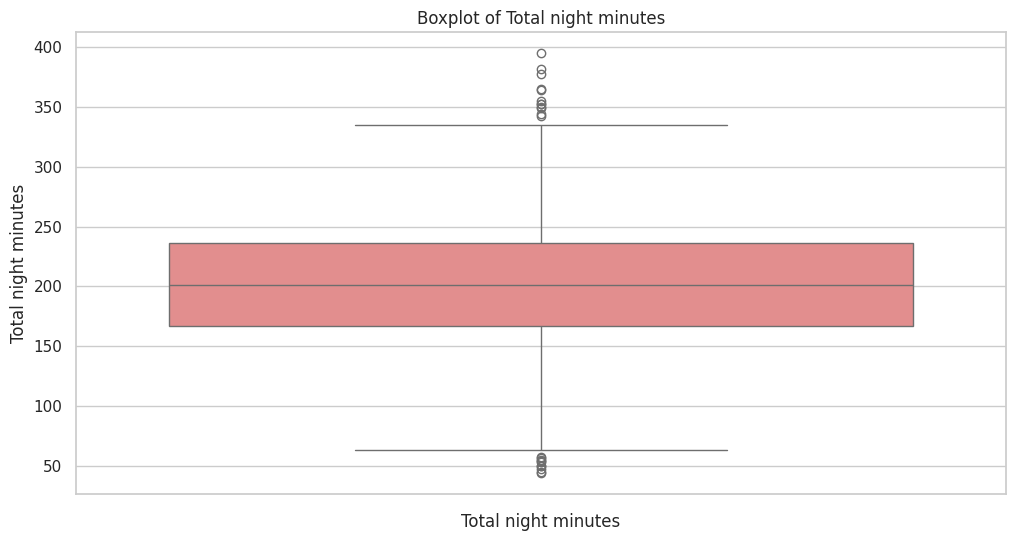

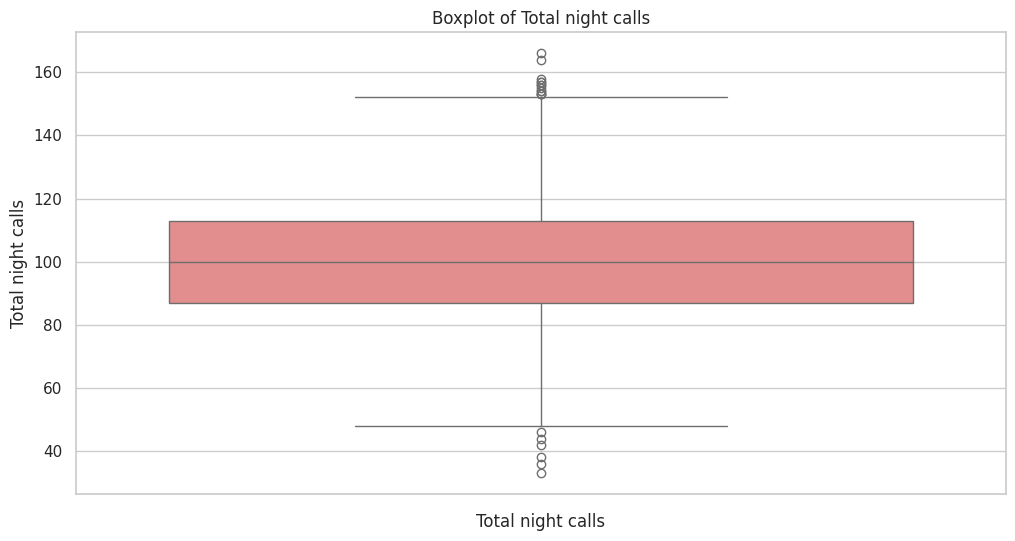

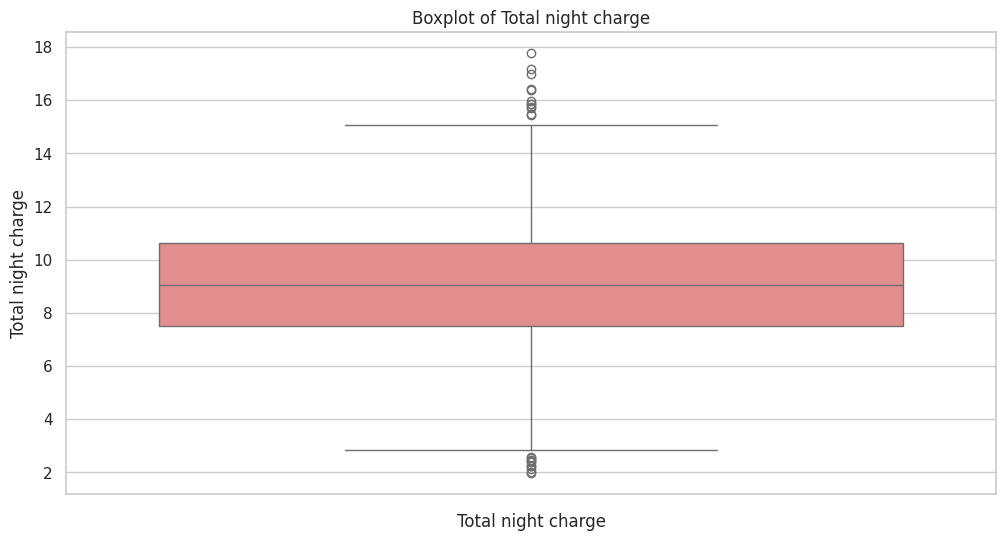

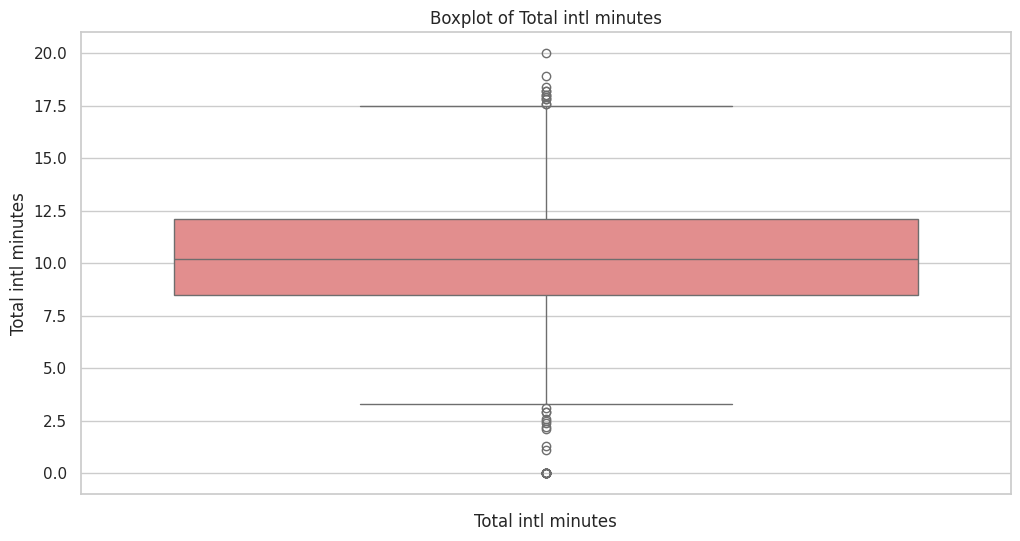

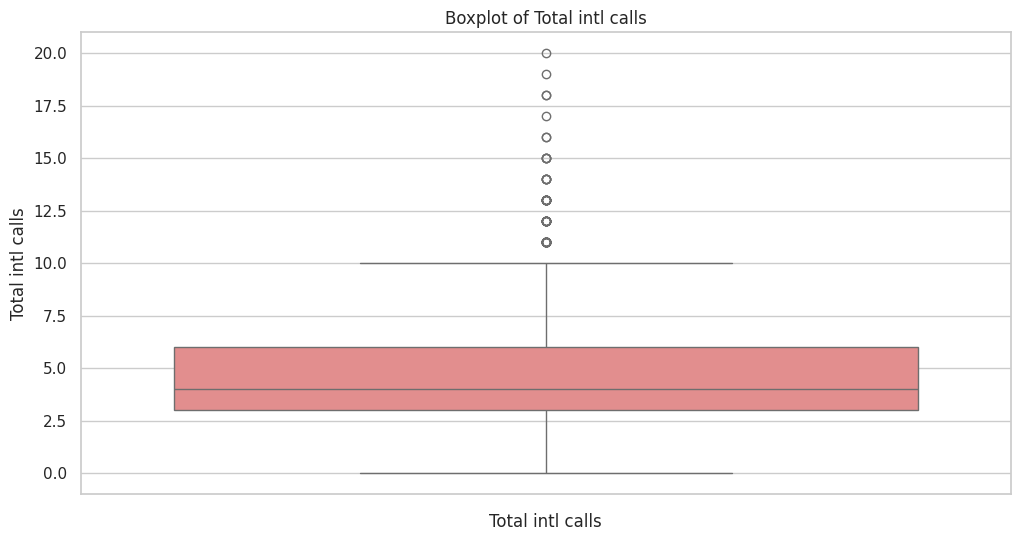

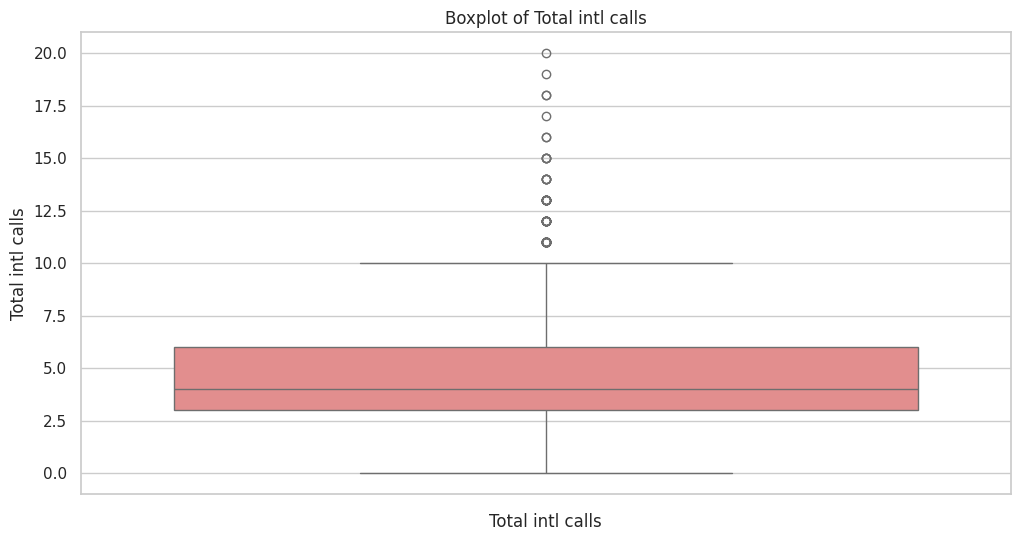

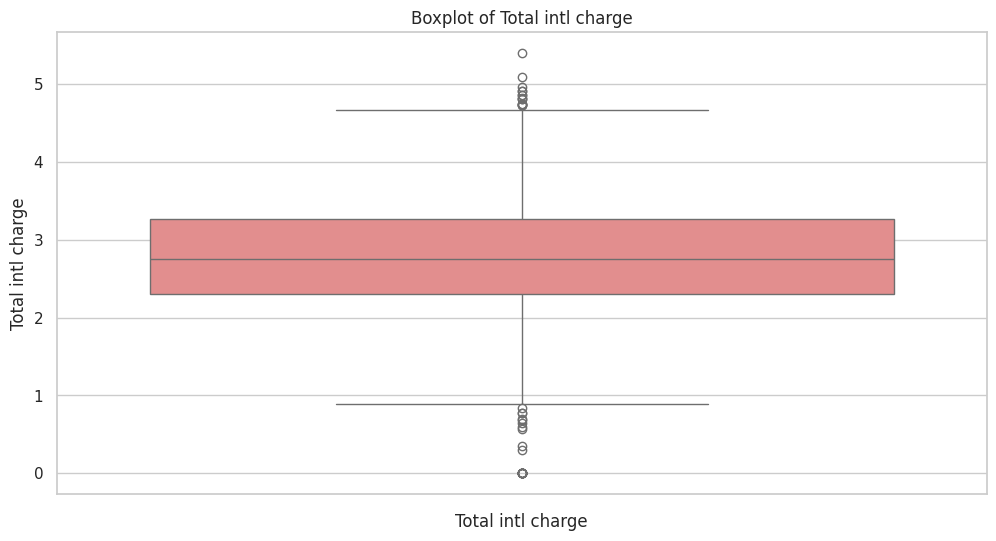

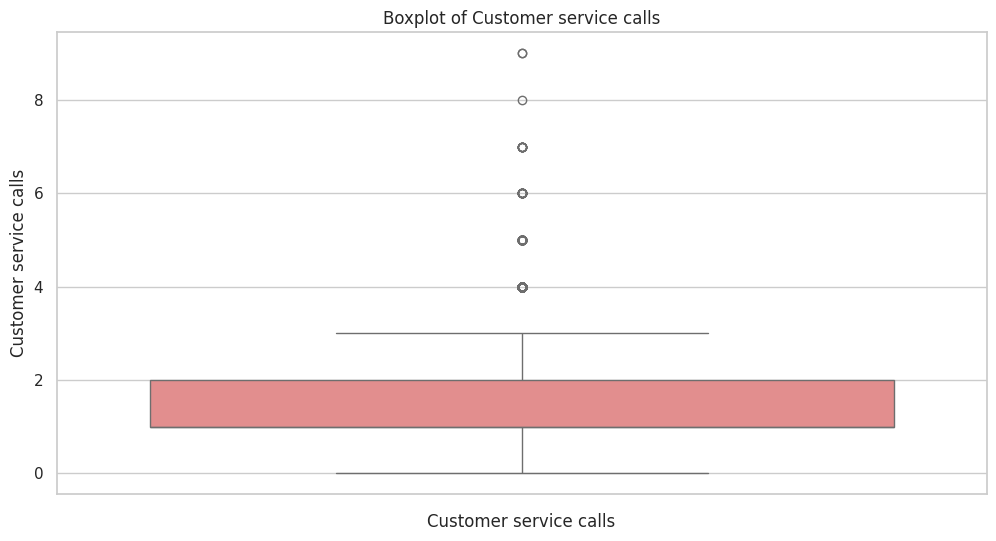

In [17]:
for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(train_data[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

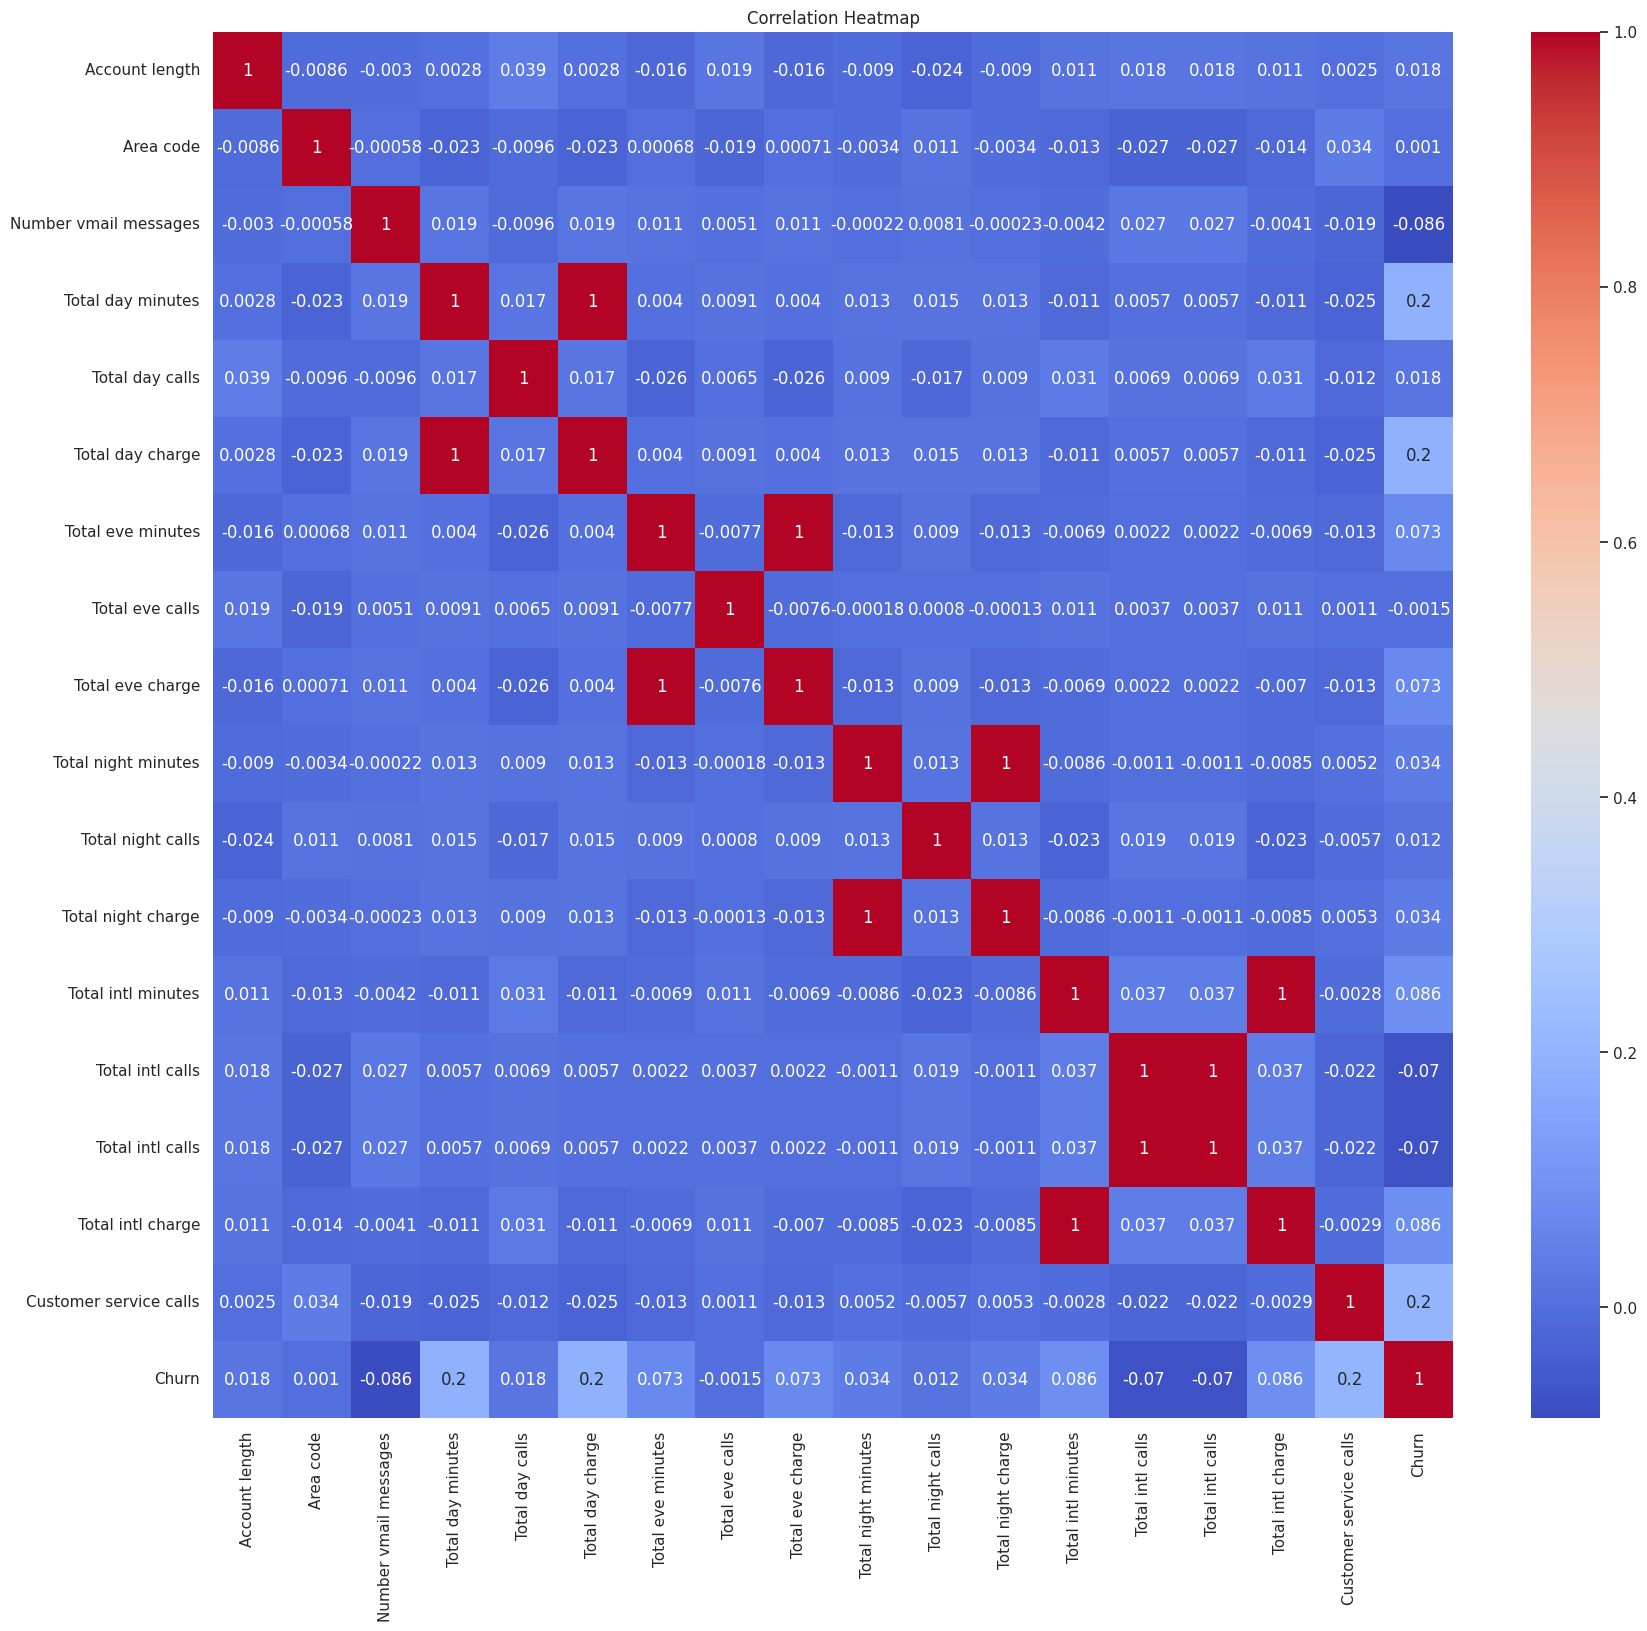

In [19]:
plt.figure(figsize=(20,18))
correlation_matrix = train_data[numeric_features + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Now lets visualize the categorical features in the data

<ipython-input-21-139cd8f3fa69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


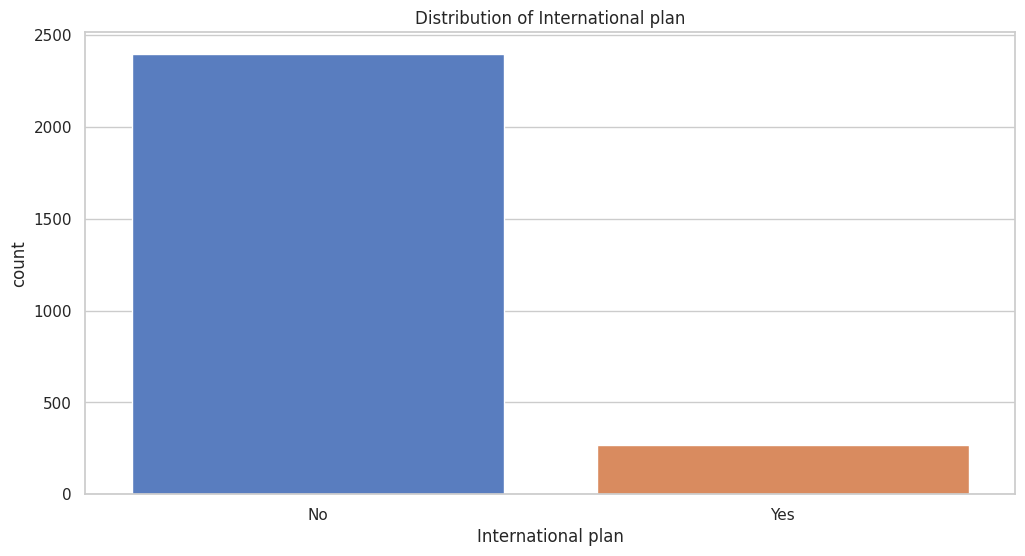

<ipython-input-21-139cd8f3fa69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


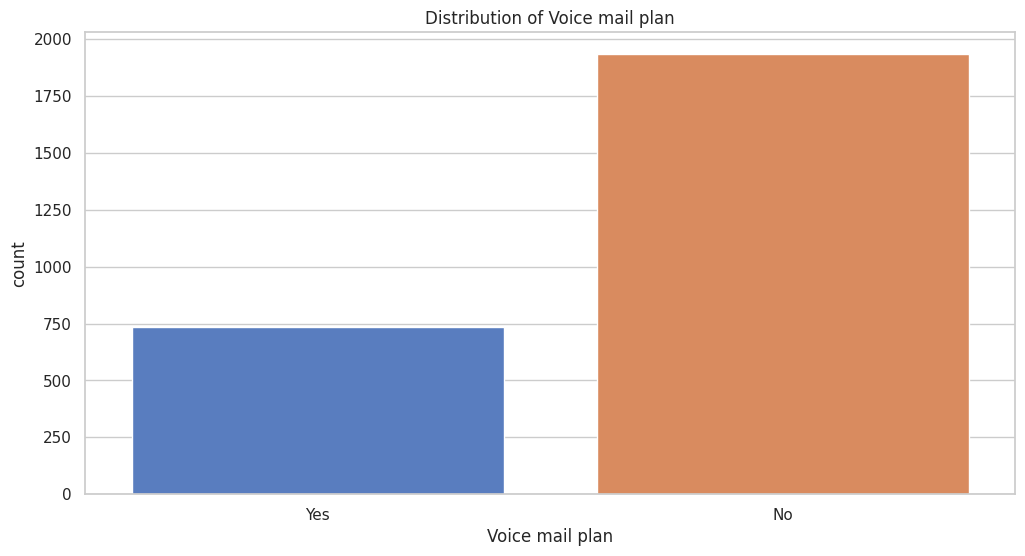

<ipython-input-21-139cd8f3fa69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


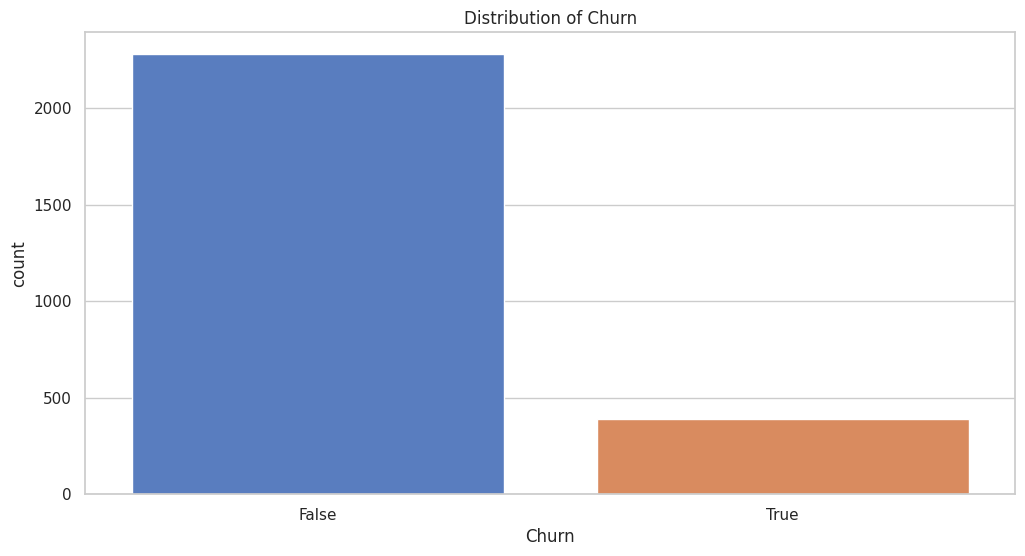

In [21]:
categorical_features = ['International plan', 'Voice mail plan', 'Churn']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=train_data[feature], palette='muted')
    plt.title(f'Distribution of {feature}')
    plt.show()

Now just visualization for only the states

<ipython-input-22-38e517f8ee48>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data[feature], palette='muted')


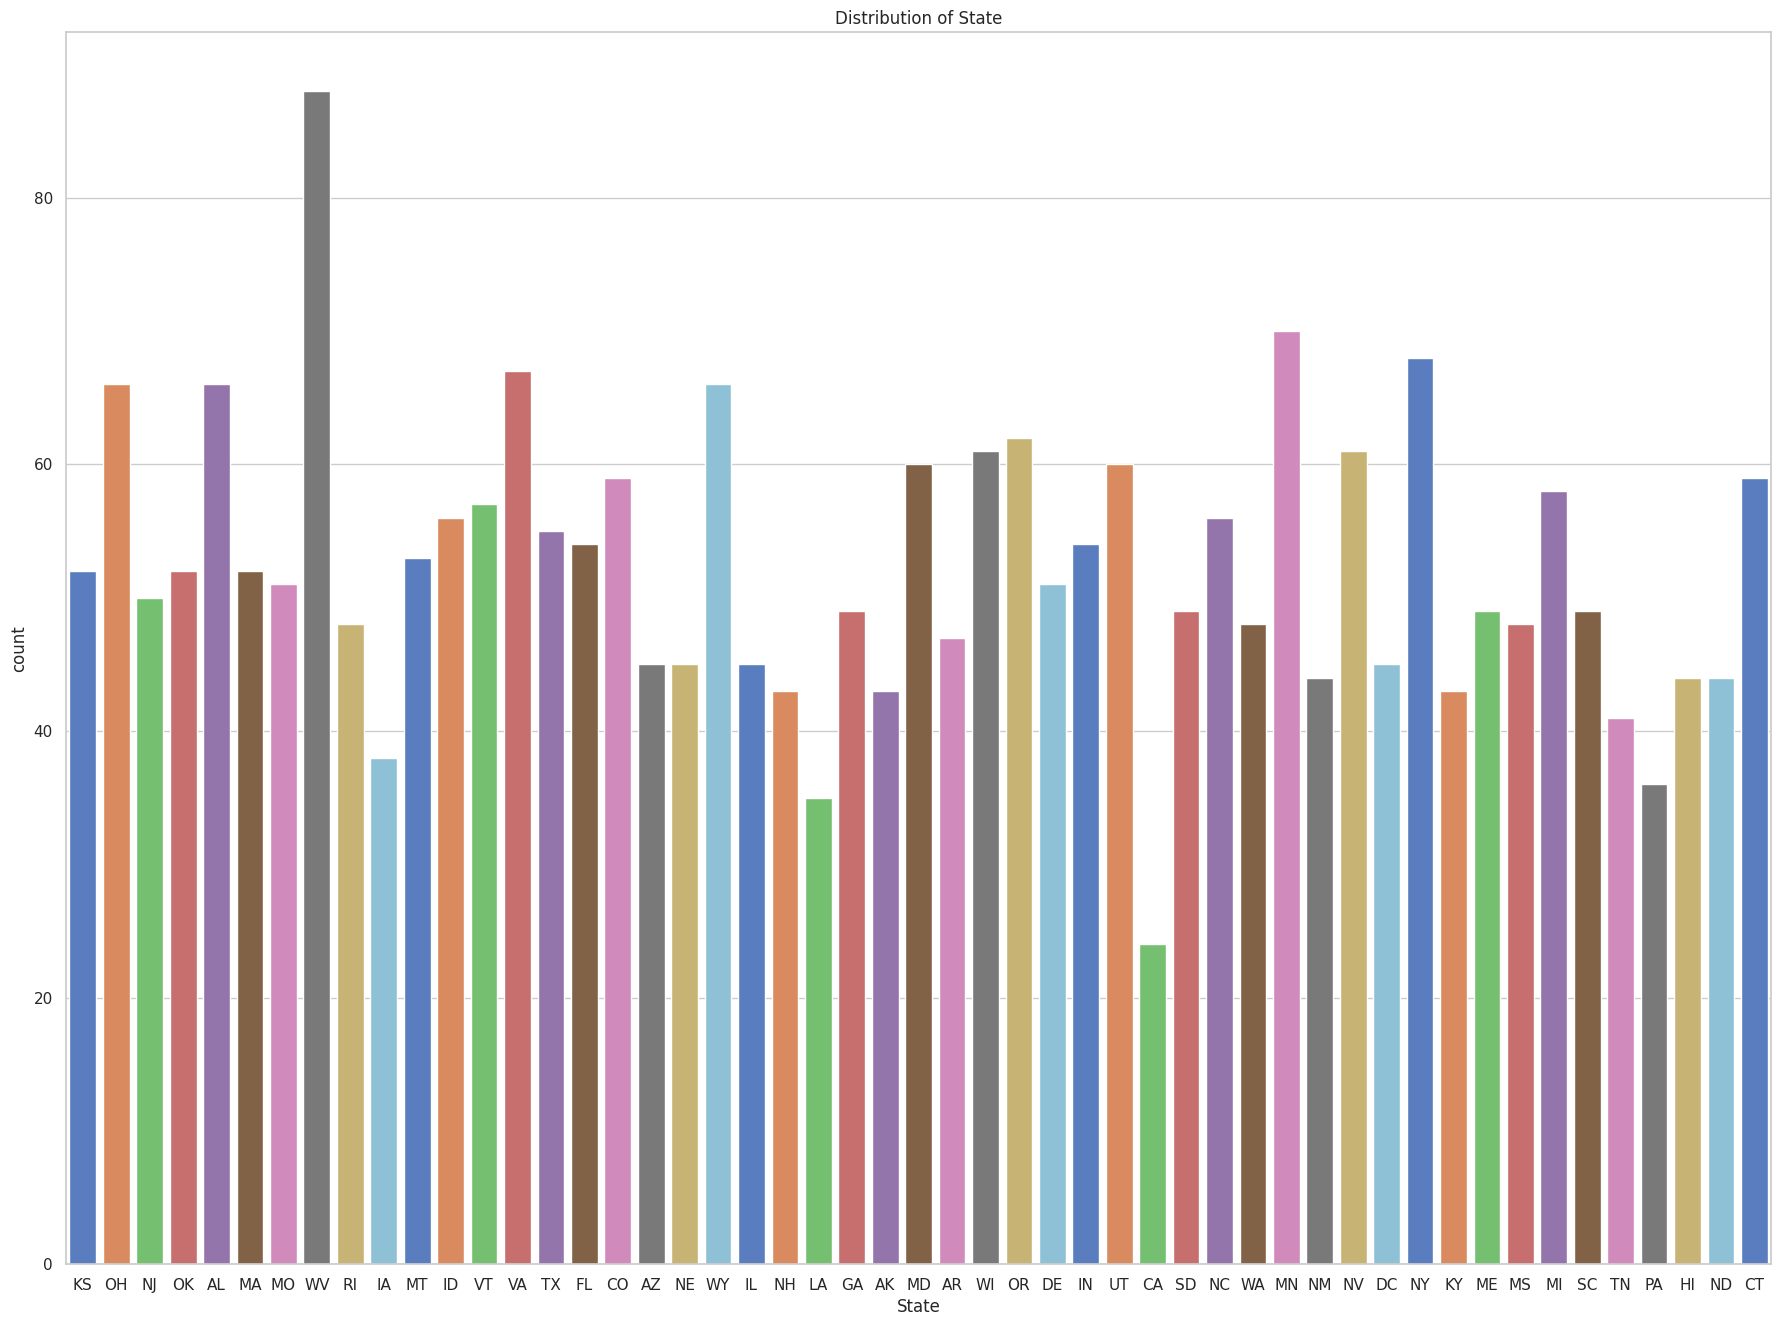

In [22]:
categorical_features = ['State']

for feature in categorical_features:
    plt.figure(figsize=(22, 16))
    sns.countplot(x=train_data[feature], palette='muted')
    plt.title(f'Distribution of {feature}')
    plt.show()

#Churn Analysis

Analyzing churn patterns across individual features can reveal insights that might guide our modeling choices.

<ipython-input-23-ebd0906813aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_state.index, y=churn_by_state.values, palette="viridis")


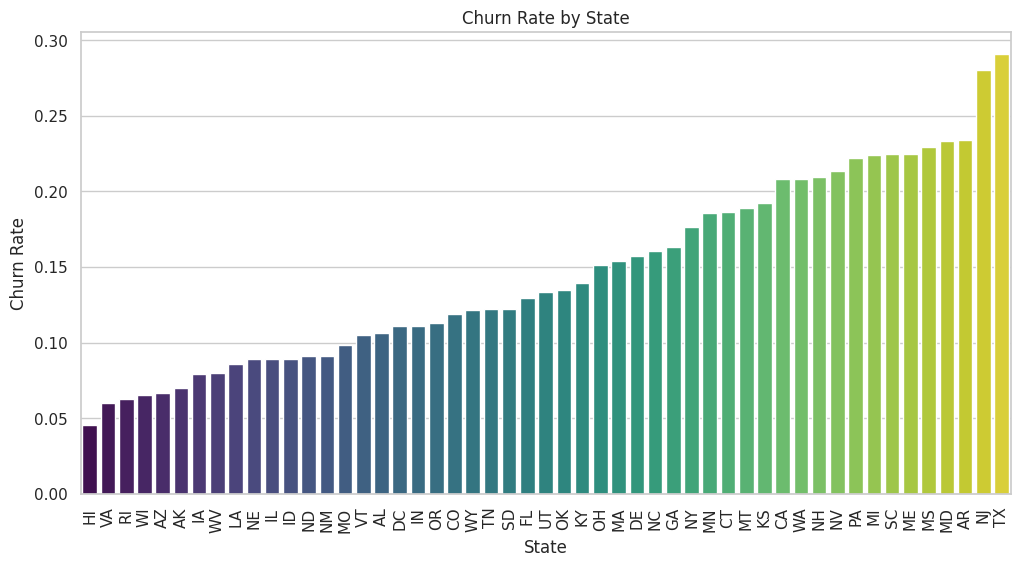

<ipython-input-23-ebd0906813aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_data, x="International plan", y="Churn", estimator=lambda x: sum(x)/len(x), ax=axes[0], palette="Blues")
<ipython-input-23-ebd0906813aa>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_data, x="Voice mail plan", y="Churn", estimator=lambda x: sum(x)/len(x), ax=axes[1], palette="Greens")


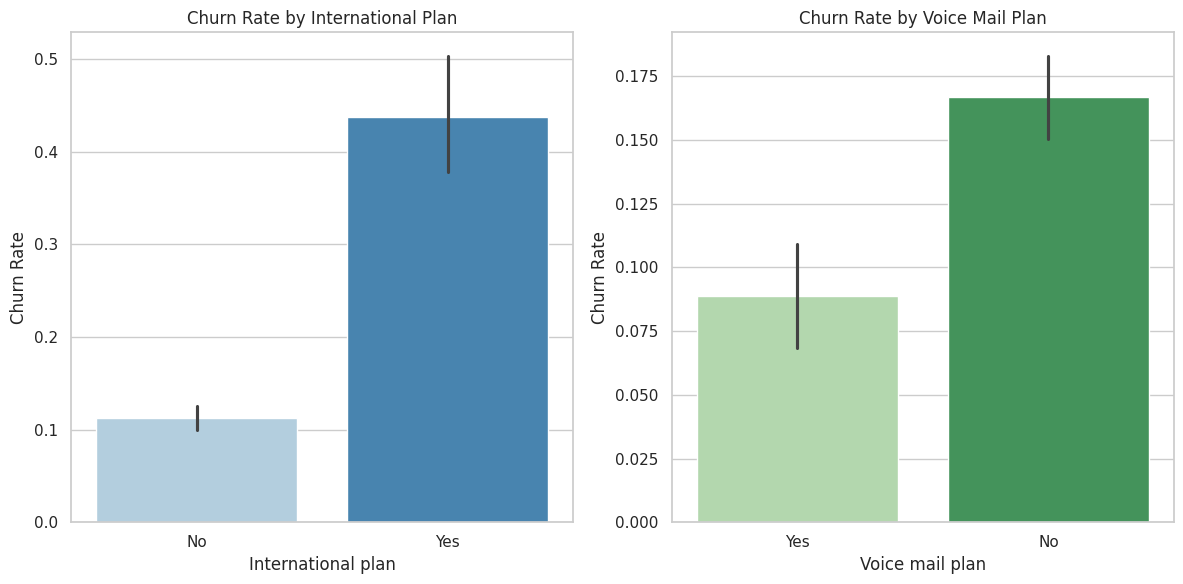

<ipython-input-23-ebd0906813aa>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_data, x="Customer service calls", y="Churn", estimator=lambda x: sum(x)/len(x), palette="rocket")


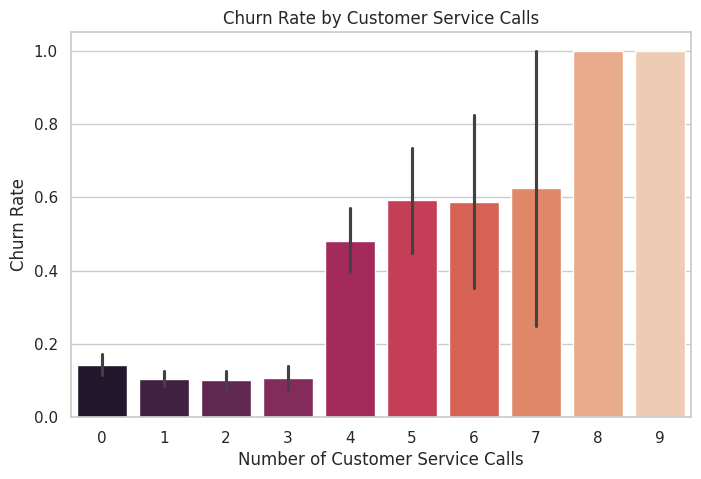

<ipython-input-23-ebd0906813aa>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x="Churn", y="Total day minutes", palette="coolwarm")


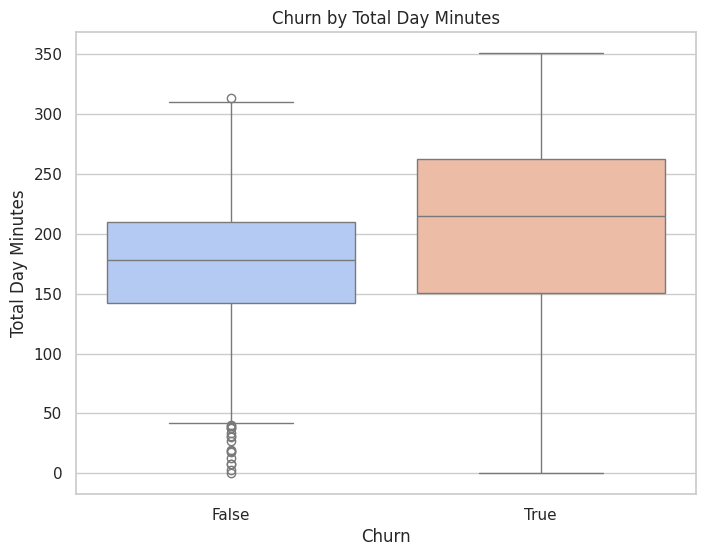

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
churn_by_state = train_data.groupby('State')['Churn'].mean().sort_values()
sns.barplot(x=churn_by_state.index, y=churn_by_state.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Churn Rate by State')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=train_data, x="International plan", y="Churn", estimator=lambda x: sum(x)/len(x), ax=axes[0], palette="Blues")
axes[0].set_title('Churn Rate by International Plan')
axes[0].set_ylabel('Churn Rate')

sns.barplot(data=train_data, x="Voice mail plan", y="Churn", estimator=lambda x: sum(x)/len(x), ax=axes[1], palette="Greens")
axes[1].set_title('Churn Rate by Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=train_data, x="Customer service calls", y="Churn", estimator=lambda x: sum(x)/len(x), palette="rocket")
plt.title('Churn Rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x="Churn", y="Total day minutes", palette="coolwarm")
plt.title('Churn by Total Day Minutes')
plt.ylabel('Total Day Minutes')
plt.show()

#Data Preprocessing

Now that we have visualized the data, the next step is Data Preprocessing to prepare the dataset for modeling. This step will involve encoding categorical variables, scaling numerical features, and creating new features if necessary.

We need to convert categorical variables like State, International plan, and Voice mail plan into a numerical format.

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_train = train_data.copy()


df_train = pd.get_dummies(df_train, columns=['State'], drop_first=True)


binary_columns = ['International plan', 'Voice mail plan']
label_encoder = LabelEncoder()
for column in binary_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

df_train = df_train.astype(int)


numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes',
    'Total day calls', 'Total day charge', 'Total eve minutes',
    'Total eve calls', 'Total eve charge', 'Total night minutes',
    'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])


df_train['Churn'] = label_encoder.fit_transform(df_train['Churn'])


In [30]:
print(df_train.head())

   Account length  Area code  International plan  Voice mail plan  \
0        0.692163        415                   0                1   
1        0.161278        415                   0                1   
2        0.919686        415                   0                0   
3       -0.420168        408                   1                0   
4       -0.647691        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0               1.247508           1.586032         0.484868   
1               1.320985          -0.332881         1.135375   
2              -0.589414           1.180108         0.685024   
3              -0.589414           2.213370        -1.466653   
4              -0.589414          -0.240625         0.634985   

   Total day charge  Total eve minutes  Total eve calls  ...  State_SD  \
0          1.624886          -0.057615        -0.050781  ...         0   
1         -0.327907          -0.096875         0.147

#Training the Models

Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_train.drop('Churn', axis=1)
y = df_train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_val, y_pred_proba))

Confusion Matrix:
[[435  21]
 [ 63  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       456
           1       0.42      0.19      0.26        78

    accuracy                           0.84       534
   macro avg       0.65      0.57      0.59       534
weighted avg       0.81      0.84      0.82       534


ROC AUC Score:
0.73740440845704


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_train.drop('Churn', axis=1)
y = df_train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_val, y_pred_proba))


Confusion Matrix:
[[435  21]
 [ 63  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       456
           1       0.42      0.19      0.26        78

    accuracy                           0.84       534
   macro avg       0.65      0.57      0.59       534
weighted avg       0.81      0.84      0.82       534


ROC AUC Score:
0.8933029689608638


Decision Tree

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_train.drop('Churn', axis=1)
y = df_train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_val)
y_pred_proba = tree_model.predict_proba(X_val)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_val, y_pred_proba))

Confusion Matrix:
[[433  23]
 [ 25  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       456
           1       0.70      0.68      0.69        78

    accuracy                           0.91       534
   macro avg       0.82      0.81      0.82       534
weighted avg       0.91      0.91      0.91       534


ROC AUC Score:
0.8145242914979757


Support Vector Machine (SVM)




In [40]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_train.drop('Churn', axis=1)
y = df_train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(probability=True, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
y_pred_proba = svm_model.predict_proba(X_val)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_val, y_pred_proba))

Confusion Matrix:
[[456   0]
 [ 78   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       456
           1       0.00      0.00      0.00        78

    accuracy                           0.85       534
   macro avg       0.43      0.50      0.46       534
weighted avg       0.73      0.85      0.79       534


ROC AUC Score:
0.7014732343679712


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost

In [41]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


X = df_train.drop('Churn', axis=1)
y = df_train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_val, y_pred_proba))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:47:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[450   6]
 [ 21  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       456
           1       0.90      0.73      0.81        78

    accuracy                           0.95       534
   macro avg       0.93      0.86      0.89       534
weighted avg       0.95      0.95      0.95       534


ROC AUC Score:
0.8613641475483582


Best Performing Model: Random Forest and XGBoost show excellent performance with high accuracy and strong metrics for both classes.

Now lets investigating feature importance for the best models to understand what drives churn.

For Randon Forest

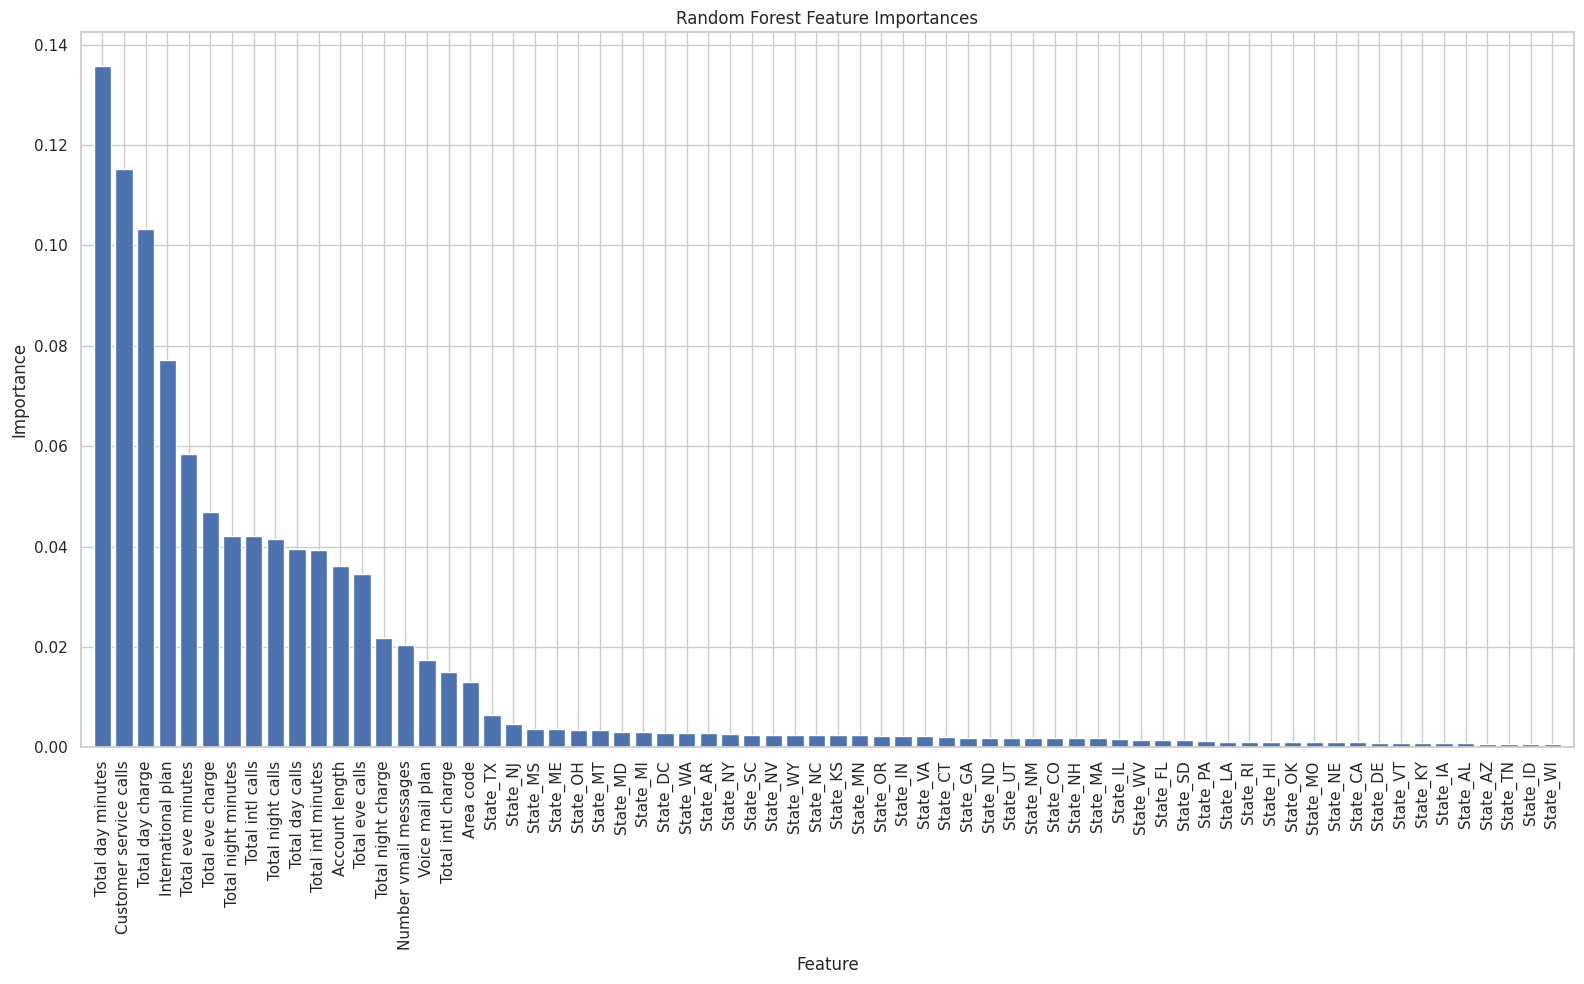

In [48]:
importances_rf = rf_model.feature_importances_

feature_names = rf_model.feature_names_in_

indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(16, 10))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(importances_rf)), importances_rf[indices_rf], align="center")
plt.xticks(range(len(importances_rf)), feature_names[indices_rf], rotation=90)
plt.xlim([-1, len(importances_rf)])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

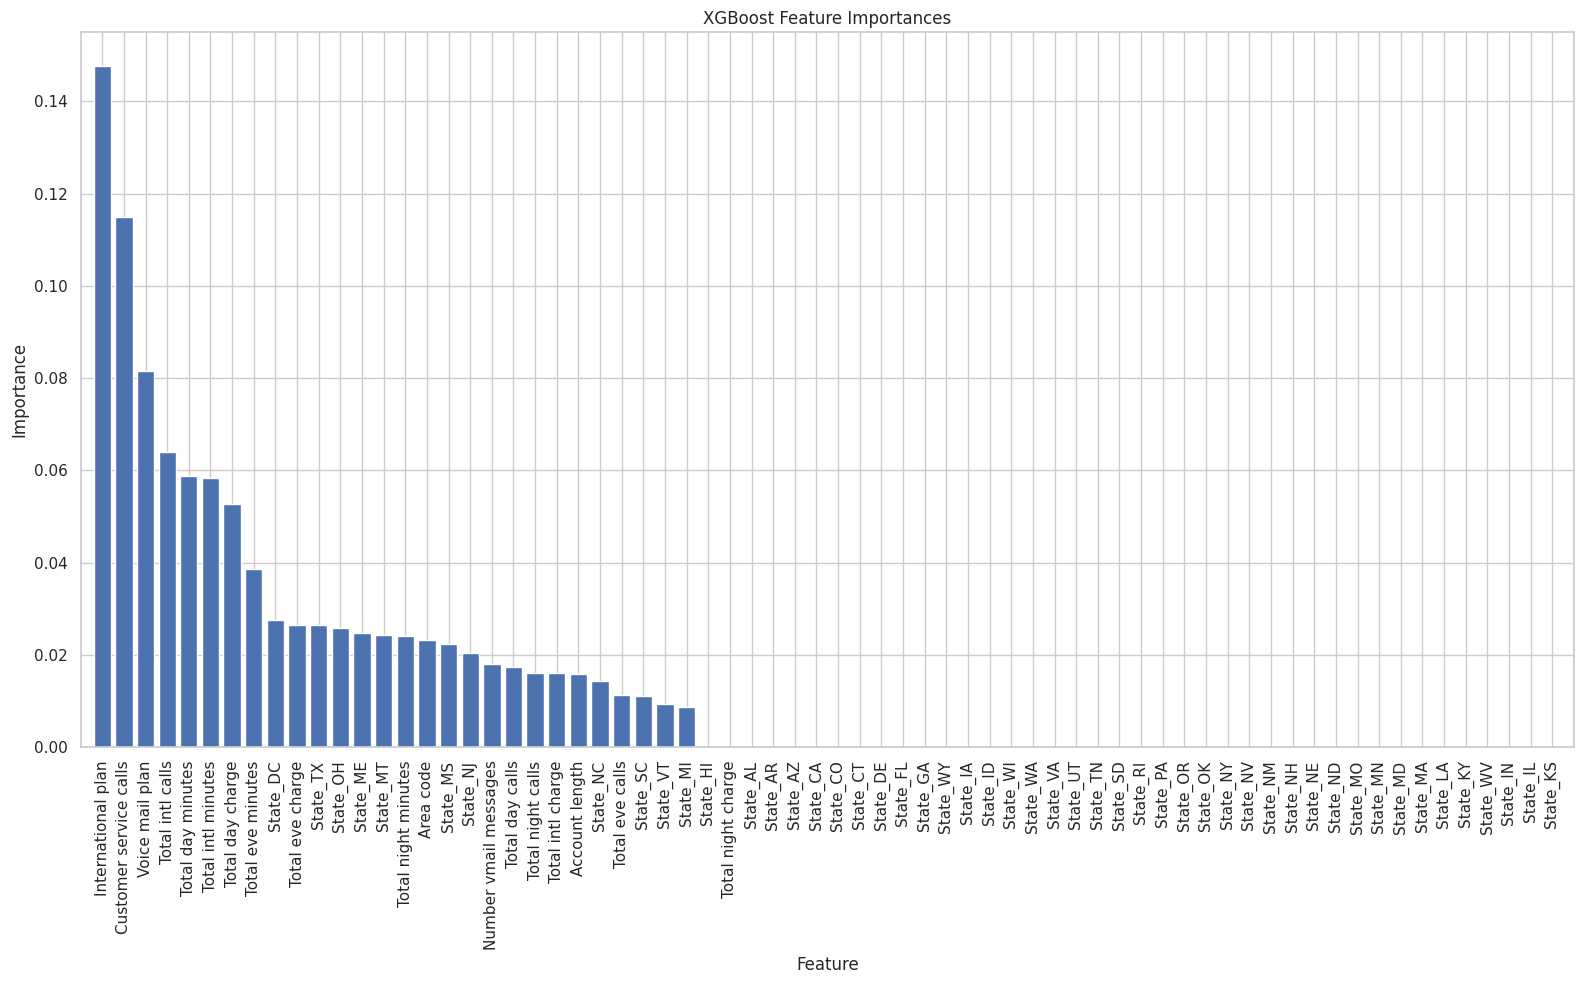

In [50]:
importances_xgb = xgb_model.feature_importances_
try:
    feature_names = xgb_model.feature_names_in_
except AttributeError:
    feature_names = X_train.columns

indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(16, 10))
plt.title("XGBoost Feature Importances")
plt.bar(range(len(importances_xgb)), importances_xgb[indices_xgb], align="center")
plt.xticks(range(len(importances_xgb)), feature_names[indices_xgb], rotation=90)
plt.xlim([-1, len(importances_xgb)])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

#Model Testing

Now we have to test the test_data on the two models (Random Forest and XGBoost).

We need to make sure the test data is preprocessed in the same way as the training data. This includes encoding categorical variables and scaling numeric features.

In [55]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_test = test_data.copy()

original_columns = df_test.columns

df_test = pd.get_dummies(df_test, columns=['State'], drop_first=True)

binary_columns = ['International plan', 'Voice mail plan']
label_encoder = LabelEncoder()
for column in binary_columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])

numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes',
    'Total day calls', 'Total day charge', 'Total eve minutes',
    'Total eve calls', 'Total eve charge', 'Total night minutes',
    'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

scaler = StandardScaler()
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])

df_test['Churn'] = label_encoder.fit_transform(df_test['Churn'])

missing_cols = set(rf_model.feature_names_in_) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0

extra_cols = set(df_test.columns) - set(rf_model.feature_names_in_)
df_test = df_test.drop(columns=extra_cols)

df_test = df_test[rf_model.feature_names_in_]

In [58]:
rf_predictions = rf_model.predict(df_test)

rf_probabilities = rf_model.predict_proba(df_test)[:, 1]

xgb_predictions = xgb_model.predict(df_test)

xgb_probabilities = xgb_model.predict_proba(df_test)[:, 1]

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_true = test_data['Churn'].values

rf_cm = confusion_matrix(y_true, rf_predictions)
rf_report = classification_report(y_true, rf_predictions)
rf_roc_auc = roc_auc_score(y_true, rf_probabilities)

print("Random Forest Confusion Matrix:")
print(rf_cm)
print("\nRandom Forest Classification Report:")
print(rf_report)
print("\nRandom Forest ROC AUC Score:", rf_roc_auc)

xgb_cm = confusion_matrix(y_true, xgb_predictions)
xgb_report = classification_report(y_true, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_true, xgb_probabilities)

print("XGBoost Confusion Matrix:")
print(xgb_cm)
print("\nXGBoost Classification Report:")
print(xgb_report)
print("\nXGBoost ROC AUC Score:", xgb_roc_auc)


Random Forest Confusion Matrix:
[[570   2]
 [ 37  58]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       572
        True       0.97      0.61      0.75        95

    accuracy                           0.94       667
   macro avg       0.95      0.80      0.86       667
weighted avg       0.94      0.94      0.94       667


Random Forest ROC AUC Score: 0.9395564961354435
XGBoost Confusion Matrix:
[[562  10]
 [ 35  60]]

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       572
        True       0.86      0.63      0.73        95

    accuracy                           0.93       667
   macro avg       0.90      0.81      0.84       667
weighted avg       0.93      0.93      0.93       667


XGBoost ROC AUC Score: 0.8765366212734634
